# Project Case Scenario
### Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.
- Is there a significant difference in the median value of houses bounded by the Charles river or not?

- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

### Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic.

## Overview of Project Tasks
**Final Project:** For the project scenario, here is an overview of your tasks. The following reading sections will provide you with detailed instructions for each task.

### Project Tasks:

**Task 1:** Familiarize yourself with the dataset
-     CRIM - per capita crime rate by town

-     ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

-     INDUS - proportion of non-retail business acres per town.

-     CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

-     NOX - nitric oxides concentration (parts per 10 million)

-     RM - average number of rooms per dwelling

-     AGE - proportion of owner-occupied units built prior to 1940

-     DIS - weighted distances to five Boston employment centres

-     RAD - index of accessibility to radial highways

-     TAX - full-value property-tax rate per 10,000 dollars

-     PTRATIO - pupil-teacher ratio by town

-     LSTAT - percent lower status of the population

-     MEDV - Median value of owner-occupied homes in 1000's of dollars

**Task 2:** (Optional) If you do not already have an instance of Watson Studio, create an IBM Cloud Lite account and provision an instance of Waston Studio.

**Task 3:** Load the dataset in a Jupyter Notebook using Watson Studio.

**Task 4:** Generate basic statistics and visualizations for upper management.

**Task 5:** Use the appropriate tests to answer the questions provided.

**Task 6:** Share your Jupyter Notebook.

### **Task 3**

In [19]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


### Task 4

- For the "Median value of owner-occupied homes" provide a boxplot

- Provide a  bar plot for the Charles river variable

- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

- Create a histogram for the pupil to teacher ratio variable

### Task 4 part 1

In [7]:
print(boston_df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

In [13]:
median_value= boston_df['MEDV'].median()
f'The median value is {median_value}, which is ${median_value*1000}'

'The median value is 21.2, which is $21200.0'

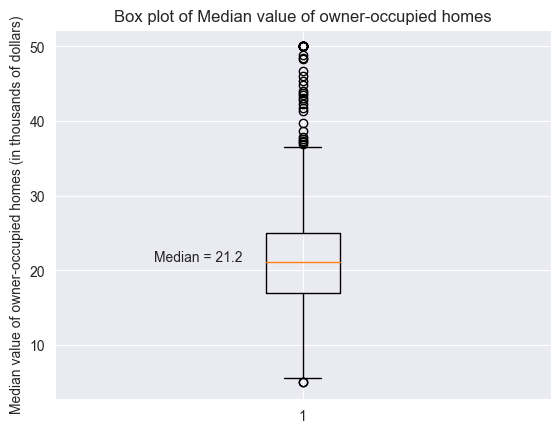

In [44]:
plt.boxplot(boston_df['MEDV'])
median = boston_df['MEDV'].median()
#plt.axhline(y=median, color='r', linestyle='-')
plt.text(0.7, median, f'Median = {median:.1f}')
plt.title('Box plot of Median value of owner-occupied homes')
plt.ylabel('Median value of owner-occupied homes (in thousands of dollars)')
plt.show()

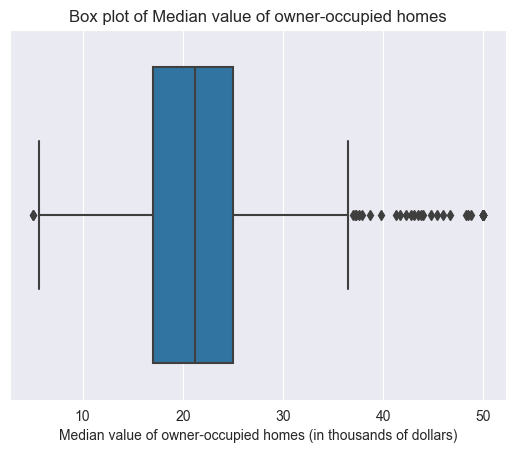

In [43]:
sns.boxplot(x=boston_df['MEDV'])
plt.title('Box plot of Median value of owner-occupied homes')
plt.xlabel('Median value of owner-occupied homes (in thousands of dollars)')
plt.show()

### Task 4 part 2

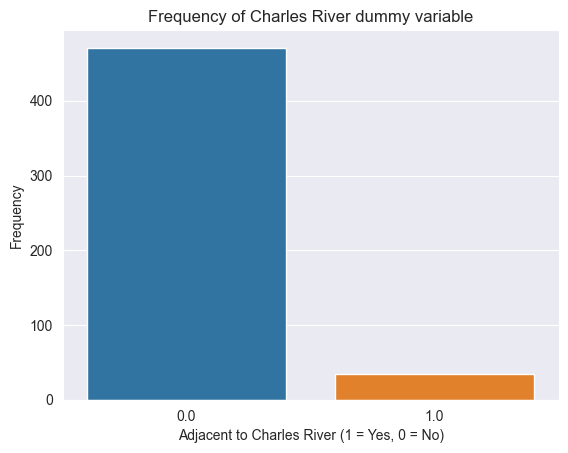

In [80]:
sns.countplot(x='CHAS', data=boston_df)
plt.title('Frequency of Charles River dummy variable')
plt.xlabel('Adjacent to Charles River (1 = Yes, 0 = No)')
plt.ylabel('Frequency')
plt.show()

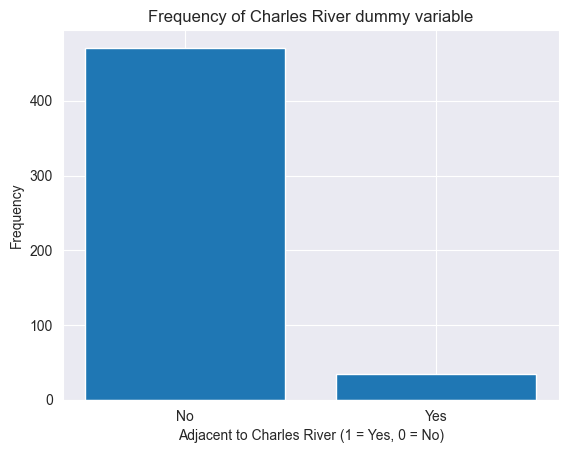

In [84]:
chas_counts = boston_df['CHAS'].value_counts()
plt.bar(chas_counts.index, chas_counts.values)
plt.xticks([0, 1], labels=['No', 'Yes'])
plt.title('Frequency of Charles River dummy variable')
plt.xlabel('Adjacent to Charles River (1 = Yes, 0 = No)')
plt.ylabel('Frequency')
plt.show()

In [85]:
print(chas_counts)

0.0    471
1.0     35
Name: CHAS, dtype: int64


### Task 4 part 3

In [88]:
boston_df['AGE'].value_counts()

100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
         ..
58.4      1
74.4      1
73.4      1
33.1      1
89.3      1
Name: AGE, Length: 356, dtype: int64

In [136]:
lower_age = boston_df[boston_df['AGE'] <= 35]['MEDV']
middle_age = boston_df[boston_df['AGE'] > 35 & (boston_df['AGE'] < 70)]['MEDV']
higher_age = boston_df[boston_df['AGE'] >= 70]['MEDV']

In [137]:
data = [lower_age, middle_age, higher_age]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']

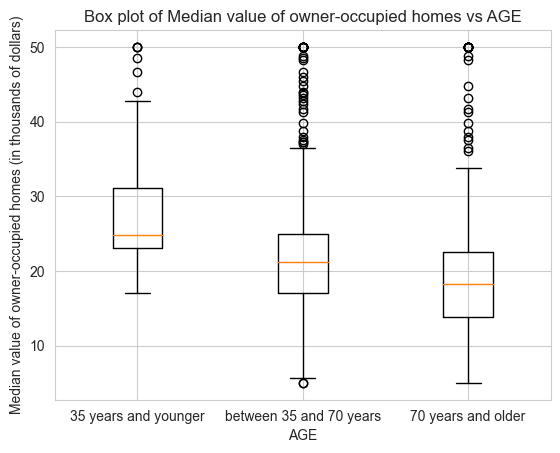

In [138]:
plt.boxplot(data, labels=labels)
plt.title('Box plot of Median value of owner-occupied homes vs AGE')
plt.xlabel('AGE')
plt.ylabel('Median value of owner-occupied homes (in thousands of dollars)')
plt.show()

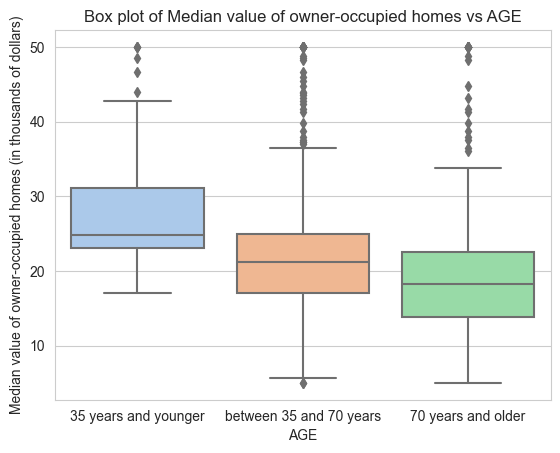

In [139]:
data = [lower_age, middle_age, higher_age]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
sns.boxplot(data=data, palette='pastel')
sns.set_style('whitegrid')
plt.title('Box plot of Median value of owner-occupied homes vs AGE')
plt.xticks(ticks=[0, 1, 2], labels=labels)
plt.xlabel('AGE')
plt.ylabel('Median value of owner-occupied homes (in thousands of dollars)')
plt.show()

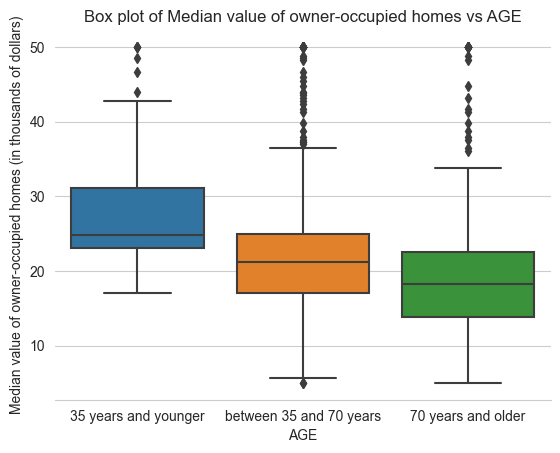

In [140]:
data = [lower_age, middle_age, higher_age]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
sns.boxplot(data=data)
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('Box plot of Median value of owner-occupied homes vs AGE')
plt.xticks(ticks=[0, 1, 2], labels=labels)
plt.xlabel('AGE')
plt.ylabel('Median value of owner-occupied homes (in thousands of dollars)')
plt.show()

### Task 4 part 4

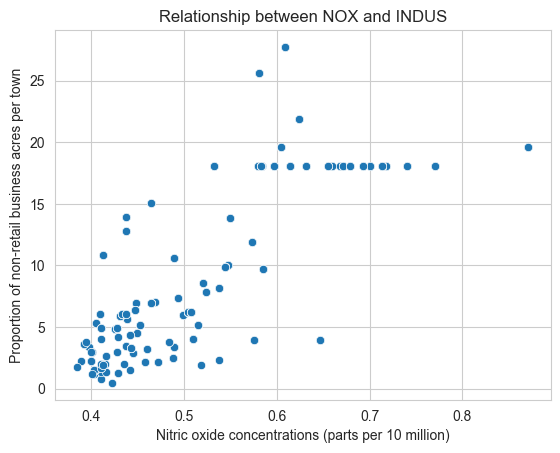

In [127]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Relationship between NOX and INDUS')
plt.xlabel('Nitric oxide concentrations (parts per 10 million)')
plt.ylabel('Proportion of non-retail business acres per town')
plt.show()

### Task 4 part 5

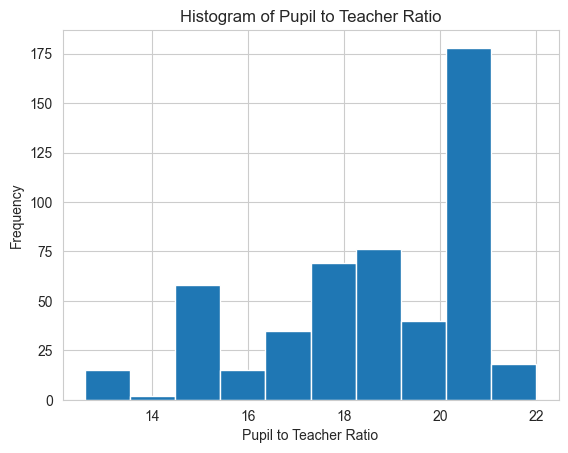

In [130]:
plt.hist(x='PTRATIO', data=boston_df)
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

### Task 5 Part 1
**Question**
- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**Requirements**
- State your hypothesis.

- Use α = 0.05

- Perform the test Statistics.

- State the conclusion from the test.

**My hypothesis is there is a significant difference in median values between the homes bound and not bound by the river**

In [131]:
from scipy.stats import ttest_ind

In [133]:
t_stat, p_value = ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'], boston_df[boston_df['CHAS']==1]['MEDV'])
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -3.996437466090509
p-value: 7.390623170519905e-05


### There is a significant difference in the median values of houses bounded by the Charles river and those that are not bound by it.

### Task 5 Part 2
**Question**
- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**My hypothesis is that there's no significant difference.**

In [134]:
from scipy.stats import f_oneway

In [135]:
results = f_oneway(boston_df[boston_df['AGE'] < 35]['MEDV'],
                        boston_df[(boston_df['AGE'] >= 35) & (boston_df['AGE'] < 70)]['MEDV'],
                        boston_df[boston_df['AGE'] >= 70]['MEDV'])

print('F-statistic:', results.statistic)
print('p-value:', results.pvalue)

F-statistic: 36.40764999196599
p-value: 1.7105011022702984e-15


### There's a significant difference in median values of houses for each proportion of owner occupied units built prior to 1940.

### Task 5 Part 3
**Question**
- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


**My hypothesis is that there is a relationship between the two.**

In [141]:
from scipy.stats import pearsonr

In [146]:
results = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print('correlation coefficient:', results.statistic)
print('p-value:', results.pvalue)

correlation coefficient: 0.7636514469209158
p-value: 7.91336106123623e-98


### there's a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town. Since the correlation coefficient is positive and high, it is a strong indication that as the nox concentration rises so does the proportion of non-retail business acres per town.

### Task 5 Part 4

**Question**
- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [147]:
import statsmodels.api as sm

In [151]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           1.21e-08
Time:                        16:04:57   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### there's significant evidence that there's an impact of additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.